In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
nba_csv = "Data/NBAKeyStats.csv"
nba_key = pd.read_csv(nba_csv)
nba_key.head()

,Year,Rank,Status,Team,Age,W,L,PW,PL,MOV,...,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1
0,1990,1.0,PQ,Phoenix Suns*,26.7,54.0,28.0,58.0,24,7.10,...,0.076,0.565,0.509,13.3,31.1,0.302,0.478,12.8,68.8,0.209
1,1990,2.0,PQ,Los Angeles Lakers*,28.9,63.0,19.0,58.0,24,6.78,...,0.120,0.562,0.512,13.2,32.8,0.271,0.479,12.8,68.5,0.219
2,1990,3.0,CC,Portland Trail Blazers*,26.7,59.0,23.0,57.0,25,6.32,...,0.075,0.535,0.486,13.4,36.5,0.269,0.479,15.2,70.8,0.265
3,1990,4.0,NBAC,Detroit Pistons*,29.5,59.0,23.0,57.0,25,6.09,...,0.078,0.537,0.490,13.4,34.2,0.245,0.461,13.7,70.3,0.262
4,1990,5.0,PQ,Utah Jazz*,27.6,55.0,27.0,54.0,28,4.79,...,0.096,0.570,0.522,15.5,30.1,0.284,0.468,13.4,69.5,0.268


In [4]:
nba_key_simple = nba_key[["Year", "Status", "Team", "SRS", "MOV", "ORtg", "DRtg", "eFG%", "TS%"]]
nba_key_simple.head()

,Year,Status,Team,SRS,MOV,ORtg,DRtg,eFG%,TS%
0,1990,PQ,Phoenix Suns*,7.09,7.10,113.1,106.2,0.509,0.565
1,1990,PQ,Los Angeles Lakers*,6.74,6.78,114.0,107.0,0.512,0.562
2,1990,CC,Portland Trail Blazers*,6.48,6.32,110.5,104.4,0.486,0.535
3,1990,NBAC,Detroit Pistons*,5.41,6.09,109.9,103.5,0.490,0.537
4,1990,PQ,Utah Jazz*,4.82,4.79,110.3,105.4,0.522,0.570


In [40]:
nba_key_simple["PR"] = ((nba_key_simple["SRS"] + nba_key_simple["MOV"]) + (nba_key_simple["ORtg"] - 
                        nba_key_simple["DRtg"]*1.25)) * (nba_key_simple["eFG%"] * nba_key_simple["TS%"]) + 10

In [41]:
nba_key_simple.head()
nba_key_simple = nba_key_simple.sort_values("PR", ascending=False)
nba_key_simple = nba_key_simple.reset_index(drop=True)
nba_key_simple.round(2)
# 10 of top 16 teams were champions

,Year,Status,Team,SRS,MOV,ORtg,DRtg,eFG%,TS%,PR
0,1996,NBAC,Chicago Bulls*,11.80,12.24,115.2,101.8,0.52,0.56,13.44
1,2017,NBAC,Golden State Warriors*,11.35,11.63,115.6,104.0,0.56,0.60,12.88
2,2016,PQ,San Antonio Spurs*,10.28,10.63,110.3,99.0,0.53,0.56,12.21
3,1997,NBAC,Chicago Bulls*,10.70,10.80,114.4,102.4,0.51,0.55,12.21
4,2016,CC,Golden State Warriors*,10.38,10.76,114.5,103.8,0.56,0.59,11.97
5,2008,NBAC,Boston Celtics*,9.30,10.26,110.2,98.9,0.52,0.57,11.82
6,1992,NBAC,Chicago Bulls*,10.07,10.44,115.5,104.5,0.52,0.56,11.55
7,2015,NBAC,Golden State Warriors*,10.01,10.10,111.6,101.4,0.54,0.57,11.53
8,2013,PQ,Oklahoma City Thunder*,9.15,9.21,112.4,102.6,0.53,0.58,10.77
9,2009,PQ,Cleveland Cavaliers*,8.68,8.93,112.4,102.4,0.52,0.56,10.58


In [42]:
nba_keydoe = nba_key_simple.groupby(["Status"])
nba_barsgraph = nba_keydoe.mean()["PR"]

<IPython.core.display.Javascript object>


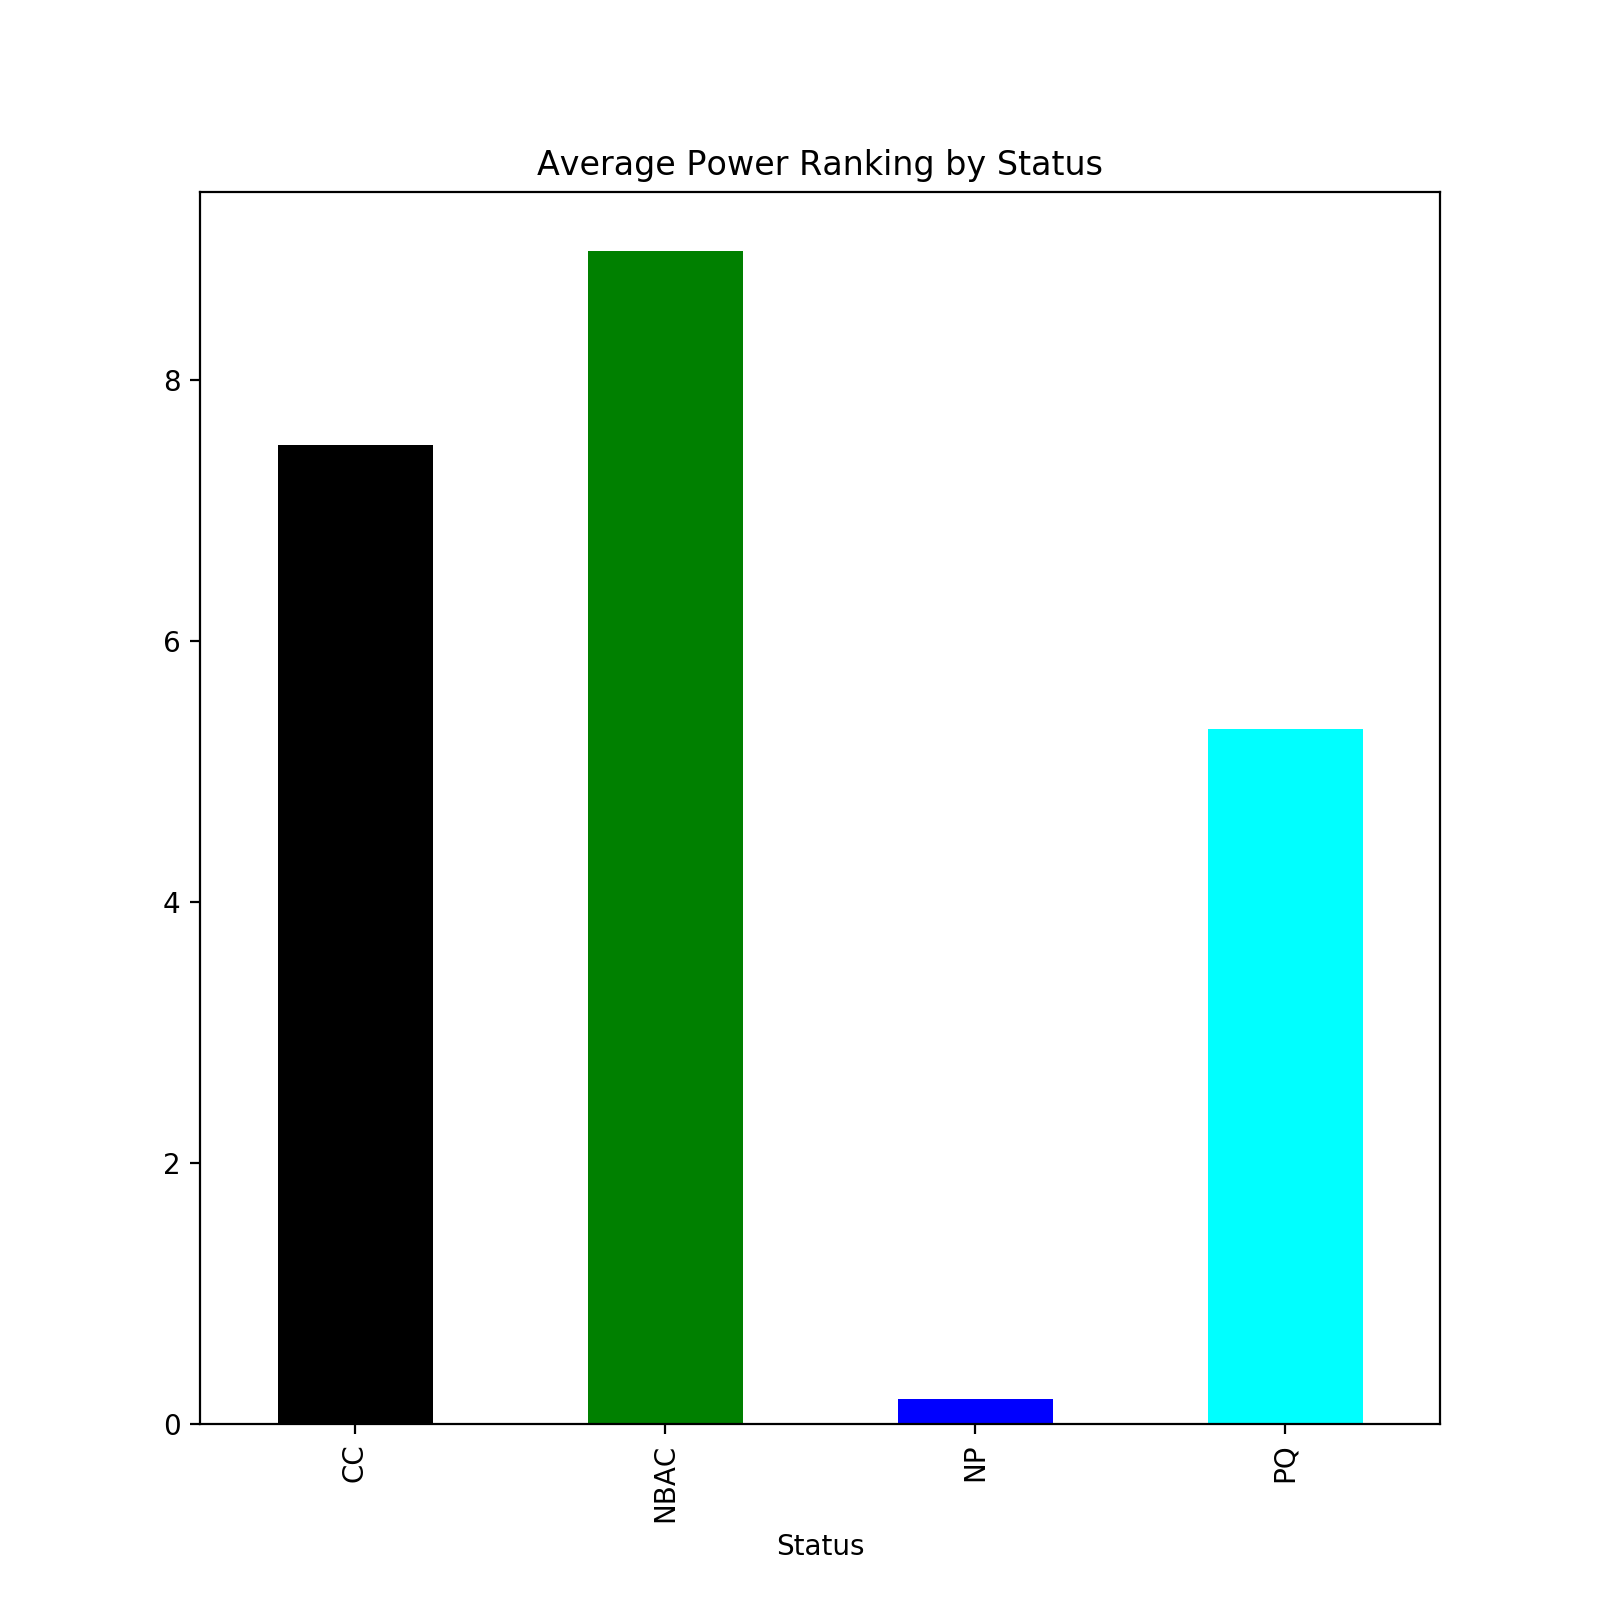

In [44]:
nba_barsgraph.plot(kind="bar", x="Status", y="Power Ranking", grid=False, figsize=(8,8), 
                   title="Average Power Ranking by Status", color=['black', 'green', 'blue', 'cyan'])

In [46]:
plt.show()
plt.savefig("PRanking.png", bbox_inches="tight")